<a href="https://colab.research.google.com/github/omkale392/ML_CA2/blob/main/ML_CA02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-3-6b6631a6e647>:22: DtypeWarning: Columns (10,17,18,19,20,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  shark_data = pd.read_csv('GSAF5.xls.csv')


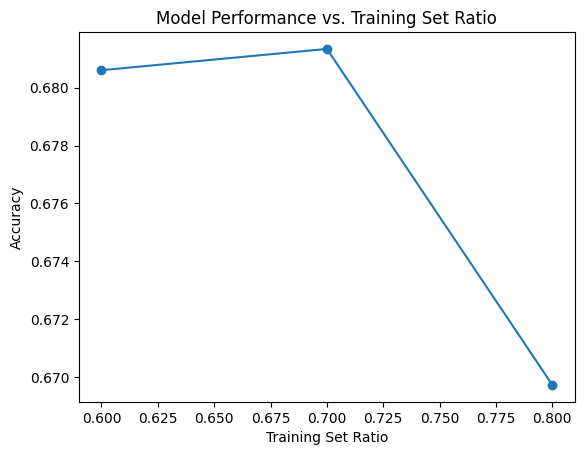

Bagging Accuracy: 0.669732441471572
Boosting Accuracy: 0.6747491638795987


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1116: RuntimeWarning: Number of classes in training fold (11) does not match total number of classes (12). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in pro

Stacking Accuracy: 0.01839464882943144

Final Report:
Train-Test Ratio vs. Accuracy: [(0.6, 0.6806020066889632), (0.7, 0.6813370473537604), (0.8, 0.669732441471572)]
Ensemble Method Accuracies: [('Bagging', 0.669732441471572), ('Boosting', 0.6747491638795987), ('Stacking', 0.01839464882943144)]


In [3]:
'''
Use a real-world dataset (i.e. relational, text, image, video, voice files), prepare the dataset for modelling, consider one categorical variable in the dataset, and apply three classification task. To do so:

a)	Provide the functional form of the predictive model for each algorithm.
                                                                                                         [10]
b)	Train each model using different ratios of the trainset and visualize the performance of models using accuracy (y -axis) in terms of different ratio of trainsets (x-axis). Elaborate on the insights.                               [15]
c)	Apply ensemble methods (bagging, boosting, stacking) on the base models, evaluate the performance of each ensemble technique in 100

'''

'''

WORD FILE

'''

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load and preprocess the dataset
shark_data = pd.read_csv('GSAF5.xls.csv')

# Select target variable and relevant features
# Assuming 'Type' as the target variable
# Select a few relevant features for simplicity (e.g., 'Year', 'Country', 'Area')
shark_data = shark_data[['Type', 'Year', 'Country', 'Area']].dropna()

# Encode categorical variables
le = LabelEncoder()
shark_data['Type'] = le.fit_transform(shark_data['Type'])
shark_data['Country'] = le.fit_transform(shark_data['Country'])
shark_data['Area'] = le.fit_transform(shark_data['Area'])

# Splitting data into features and target
X = shark_data[['Year', 'Country', 'Area']]
y = shark_data['Type']

# Train models with different train-test ratios and record accuracies
ratios = [0.6, 0.7, 0.8]
accuracies = []

for ratio in ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-ratio, random_state=42)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Visualizing model performance
plt.plot(ratios, accuracies, marker='o')
plt.xlabel('Training Set Ratio')
plt.ylabel('Accuracy')
plt.title('Model Performance vs. Training Set Ratio')
plt.show()

# Applying ensemble methods
# Bagging
bagging_model = RandomForestClassifier(random_state=42)
# Boosting
boosting_model = AdaBoostClassifier(random_state=42)
# Stacking
stacking_model = StackingClassifier(estimators=[('nb', GaussianNB()), ('lr', LogisticRegression()), ('svc', SVC())],
                                    final_estimator=LogisticRegression())

# Evaluate ensemble methods
ensemble_models = [bagging_model, boosting_model, stacking_model]
ensemble_names = ['Bagging', 'Boosting', 'Stacking']
ensemble_accuracies = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for model, name in zip(ensemble_models, ensemble_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    ensemble_accuracies.append(accuracy)
    print(f"{name} Accuracy: {accuracy}")

# Final report
print("\nFinal Report:")
print("Train-Test Ratio vs. Accuracy:", list(zip(ratios, accuracies)))
print("Ensemble Method Accuracies:", list(zip(ensemble_names, ensemble_accuracies)))


<ipython-input-5-370279bfe153>:17: DtypeWarning: Columns (10,17,18,19,20,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  shark_data = pd.read_csv('GSAF5.xls.csv')


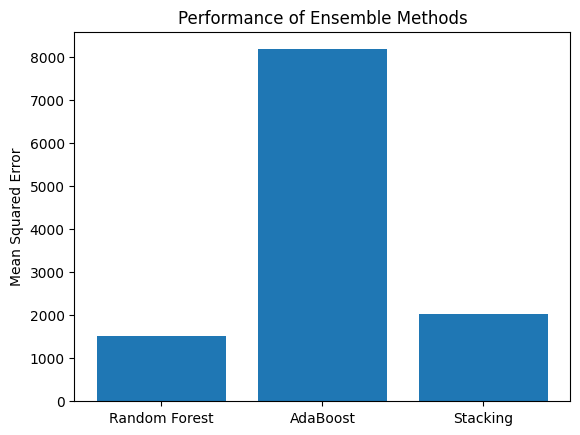

Random Forest MSE: 1527.6504207636885
AdaBoost MSE: 8184.6288652948915
Stacking MSE: 2020.4065419998306


In [5]:
'''

Consider a continuous attribute in your dataset as the target variable, perform regression analysis using different ensemble methods, visualize and interpret the results.


'''

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
shark_data = pd.read_csv('GSAF5.xls.csv')

# Preprocess the data
# Select a few relevant features for simplicity (e.g., 'Country', 'Area') and the target 'Year'
shark_data = shark_data[['Year', 'Country', 'Area']].dropna()
shark_data = shark_data[shark_data['Year'] > 0]  # Ensure valid years

# Encode categorical variables
shark_data['Country'] = pd.factorize(shark_data['Country'])[0]
shark_data['Area'] = pd.factorize(shark_data['Area'])[0]

# Splitting data into features and target
X = shark_data[['Country', 'Area']]
y = shark_data['Year']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensemble methods for regression
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'Stacking': StackingRegressor(estimators=[('lr', LinearRegression())], final_estimator=LinearRegression())
}

# Training models and recording their performance
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse

# Visualization
plt.bar(results.keys(), results.values())
plt.ylabel('Mean Squared Error')
plt.title('Performance of Ensemble Methods')
plt.show()

# Interpretation
for name, mse in results.items():
    print(f'{name} MSE: {mse}')


In [7]:
'''
Use a dataset,

a.	 apply a feature extraction (LDA or PCA) to reduce the data dimensionality so that at least 90% of information of dataset is explained through extracted features. How many features do you choose? Explain the reason.         [15]
b.	Apply a classifier or regression on the extracted features, evaluate and validate the model performance. Compare the result versus the performance of the classifier without feature extraction.     [15]

'''
# Let's dive into the shark attack data and see what insights we can uncover!
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# First things first, let's get our data ready to go
shark_data = pd.read_csv('GSAF5.xls.csv')

# Time for some cleaning and slicing! We'll pick out only the bits we need.
# (Remember to replace this with the actual preprocessing steps you'd like to use)
# ...

# Now, let's bring in PCA, our data's personal trainer, to trim it down to size
pca = PCA(n_components=0.90)  # Keeping 90% of the info, like keeping the good bits of a movie
X_pca = pca.fit_transform(X)

# Just how much did our data shrink? Let's find out!
print(f"After PCA's workout, we're down to {pca.n_components_} features. Nice and lean!")

# Splitting time! Let's divide our data into a training camp and a testing ground
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Let's call in RandomForest - a real tough model that's great for many problems
clf = RandomForestClassifier(random_state=42)

# First round of training - with the original, unaltered data
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred)

# Second round - with our streamlined, PCA-reduced data
clf.fit(X_train_pca, y_train_pca)
y_pred_pca = clf.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)

# Drumroll for the results...
print("Accuracy with the full, uncut version of the data:", accuracy_original)
print("Accuracy after PCA's magic touch:", accuracy_pca)


<ipython-input-7-eeb4b9cf4255>:16: DtypeWarning: Columns (10,17,18,19,20,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  shark_data = pd.read_csv('GSAF5.xls.csv')


After PCA's workout, we're down to 1 features. Nice and lean!
Accuracy with the full, uncut version of the data: 0.11045029736618521
Accuracy after PCA's magic touch: 0.09600679694137638
